In [238]:
import pandas as pd
import numpy as np
import seaborn as sns # For plotting
import matplotlib.cm as plt # For showing plots
##import arrow to work with days and to dehumanize expressions(like 'a year ago') on column "published_date"
import arrow

In [239]:
df=pd.read_csv('data/clean_data_set.csv')

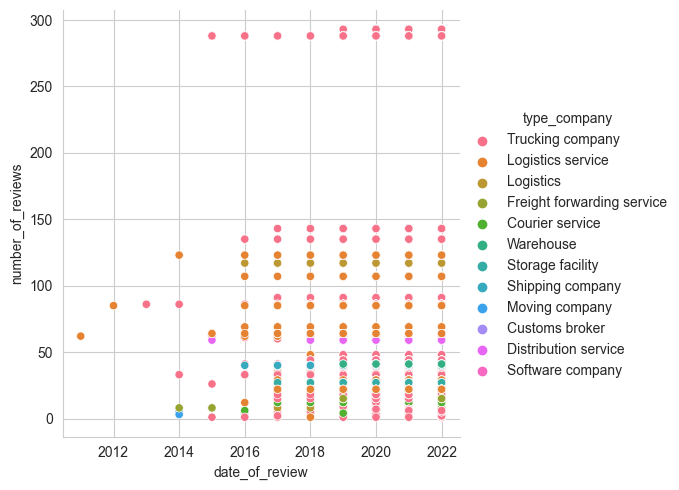

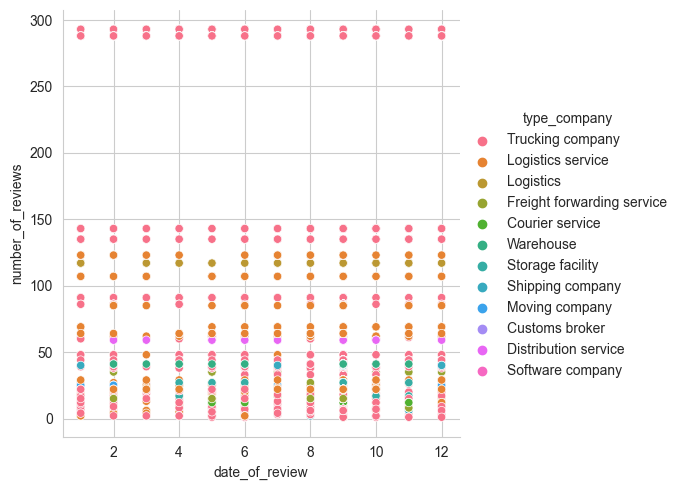

In [240]:

# Add a new nan values column named 'actual_date' so we can use it to fill in the actual date of every single "review", with in a loop
df['date_of_review']=np.nan
for i, pd in enumerate(df['published_date']):
    df.iloc[i,df.columns.get_loc('date_of_review')]=(arrow.get('2022-09-24').dehumanize(pd))#.format('YYYY-MM-DD')

def get_year(date):
    return date.format('YYYY')

def get_month(date):
    return date.format('MM')

def get_day(date):
    return date.format('DD')
df['year']=df['date_of_review'].apply(get_year).astype(int).sort_values()

sns.relplot(data=df,x=df['date_of_review'].apply(get_year).astype(int).sort_values(), y="number_of_reviews", hue= 'type_company')
sns.relplot(data=df,x=df['date_of_review'].apply(get_month).astype(int).sort_values(), y="number_of_reviews", hue= 'type_company')

Text(0.5, 1.0, 'Histogram of reviews vs year of review')

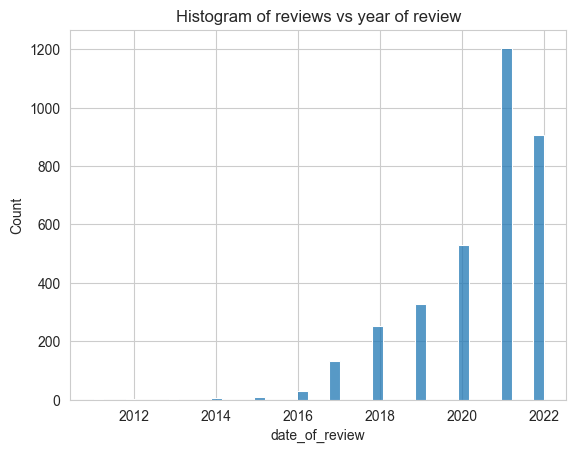

In [241]:
sns.histplot(df['date_of_review'].apply(get_year).astype(int).sort_values(), kde = False,).set_title("Histogram of reviews vs year of review")


Text(0.5, 1.0, 'Histogram of reviews vs month of review')

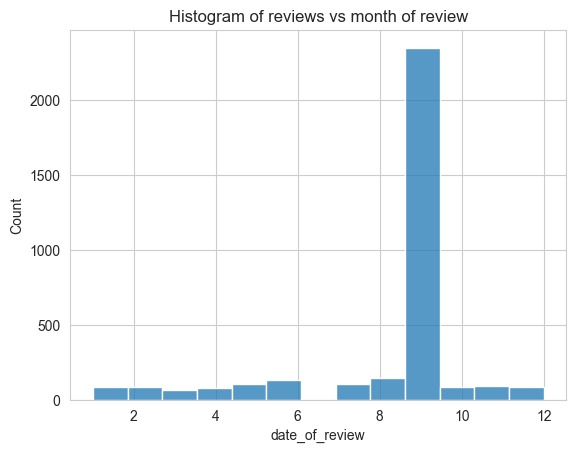

In [242]:
sns.histplot(df['date_of_review'].apply(get_month).astype(int).sort_values(), kde = False).set_title("Histogram of reviews vs month of review")


Text(0.5, 1.0, 'Histogram of reviews vs day of review')

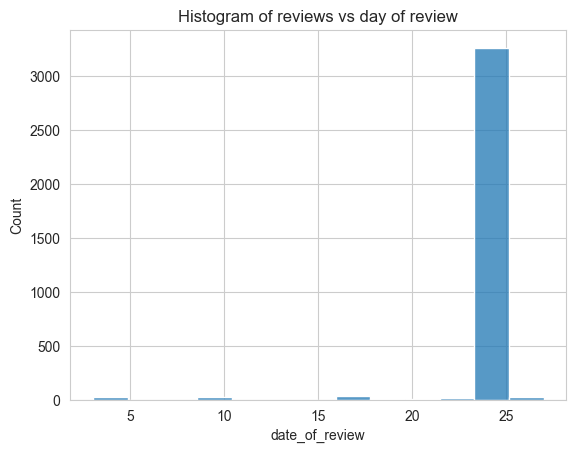

In [243]:
sns.histplot(df['date_of_review'].apply(get_day).astype(int).sort_values(), kde = False).set_title("Histogram of reviews vs day of review")


### Conclusions
<span style="font-size:20px;">We notice that the month of September has many reviews in relation to the rest of the months, this anomaly results from the method used to estimate the dates of reviews.
Dates were determined by reference to the date of data collection.
This is the main reason why September is repeated in our sample, the same anomaly is presented in greater extend when we try to determine the day the reviews were made, it turns out that most of them were made on the 24th of the month<span style="font-size:20px;">

Text(0.5, 1.0, 'number of companies in every city')

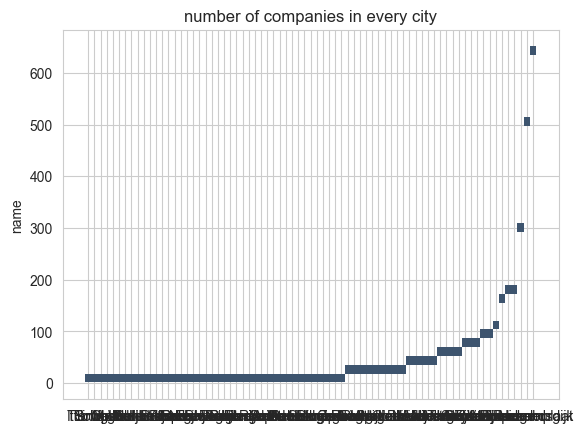

In [244]:
# cities vs number of companies
sns.histplot(x=df['city'].unique(),y=df.groupby('city')['name'].size().sort_values(),).set_title('number of companies in every city')


<AxesSubplot: xlabel='city'>

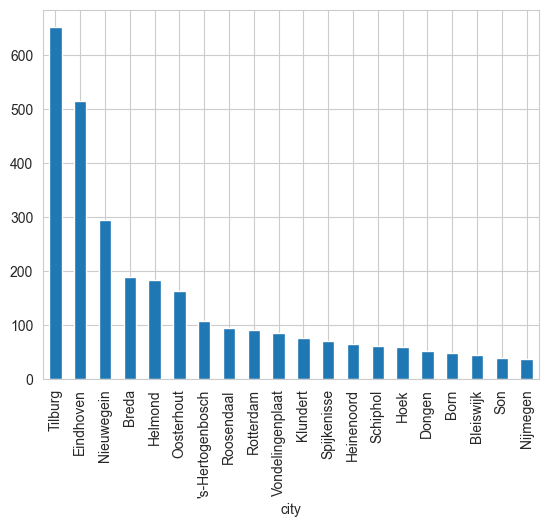

In [245]:
# the first 20 cities with the most companies vs number of companies for each city

logistics_by_City=df.groupby('city')['name'].size()

##len(cities)
top_20_cities=logistics_by_City.sort_values(ascending=False).head(n=20)
#top_20_cities.to_csv('data/top_20_cities.csv')

top_20_cities.plot(kind='bar')

<AxesSubplot: title={'center': 'number of reviews vs average of stars'}, xlabel='number_of_reviews', ylabel='avg_stars_num'>

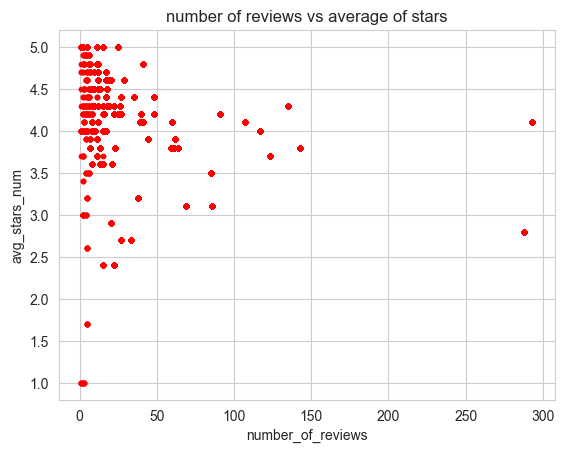

In [246]:
#2) scatter plot for number of reviews per company vs average of stars
df.plot.scatter(x='number_of_reviews',y='avg_stars_num',s=10,c= 'red',title='number of reviews vs average of stars')


<module 'matplotlib.cm' from 'C:\\Learn\\TOMlogistics\\venv\\lib\\site-packages\\matplotlib\\cm.py'>

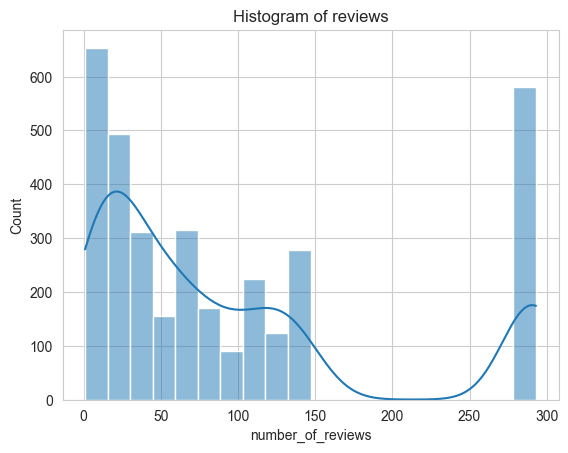

In [247]:
#distribution of number of reviews
sns.histplot(x=df['number_of_reviews'],kde=True).set_title('Histogram of reviews')
plt

Text(0.5, 1.0, 'Box of number of reviews ')

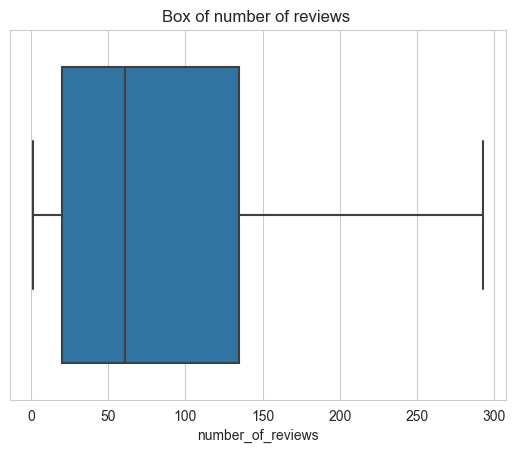

In [248]:
# Plot a boxplot of received stars
sns.boxplot(x=df['number_of_reviews']).set_title('Box of number of reviews ')


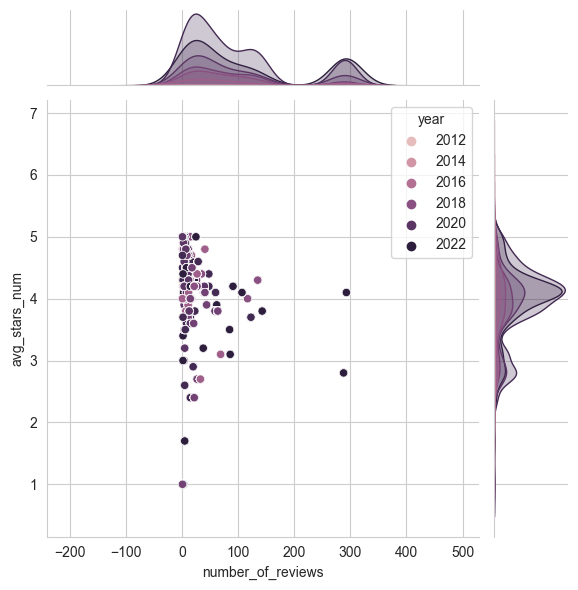

In [249]:
sns.jointplot(data=df, x="number_of_reviews", y="avg_stars_num", hue="year")